In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

import matplotlib.pyplot as plt
import math

In [2]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
import tensorflow as tf
tf.keras.applications.ResNet152V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)

import matplotlib.pyplot as plt
import math

base_dir = '/Users/jye98/Desktop/datasets4/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'test')

train_datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)



2022-05-16 23:35:23.589254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-16 23:35:23.589390: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

234684416/242745792 [============================>.] - ETA: 0s

In [ ]:
Resnet_base = ResNet152V2(weights='imagenet',
                            include_top = False,
                            input_shape = (150, 150, 3))

In [ ]:
Resnet_base.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']   

In [ ]:
model = models.Sequential()
model.add(Resnet_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
for layer in Resnet_base.layers:
    layer.trainable = False

for layer in Resnet_base.layers[15:]:
    layer.trainable = True

In [ ]:
opt = Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss = binary_crossentropy
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [ ]:
train_step = math.ceil(train_generator.n/32)
valid_step = math.ceil(validation_generator.n/32)

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = valid_step
)

/var/folders/qz/7jppp28900j0kj82xh2k9nxm0000gn/T/ipykernel_36118/4030321721.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
/Users/jye98/miniforge3/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/jye98/miniforge3/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30


2022-05-16 22:33:48.922794: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 22:33:52.689894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - ETA: 0s - loss: 0.7773 - accuracy: 0.6263

2022-05-16 22:34:53.007625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 111s 2s/step - loss: 0.7773 - accuracy: 0.6263 - val_loss: 0.5923 - val_accuracy: 0.7055
Epoch 2/30
54/54 [==============================] - 96s 2s/step - loss: 0.5829 - accuracy: 0.7072 - val_loss: 0.4972 - val_accuracy: 0.7590
Epoch 3/30
54/54 [==============================] - 95s 2s/step - loss: 0.5568 - accuracy: 0.7049 - val_loss: 1.0058 - val_accuracy: 0.6851
Epoch 4/30
54/54 [==============================] - 95s 2s/step - loss: 0.5489 - accuracy: 0.7194 - val_loss: 0.9414 - val_accuracy: 0.7334
Epoch 5/30
54/54 [==============================] - 95s 2s/step - loss: 0.4947 - accuracy: 0.7742 - val_loss: 0.4808 - val_accuracy: 0.7893
Epoch 6/30
54/54 [==============================] - 95s 2s/step - loss: 0.4708 - accuracy: 0.7718 - val_loss: 0.8385 - val_accuracy: 0.5454
Epoch 7/30
54/54 [==============================] - 95s 2s/step - loss: 0.4561 - accuracy: 0.7916 - val_loss: 0.4737 - val_accuracy: 0.8236
Epoch 8/30
54/54 [============

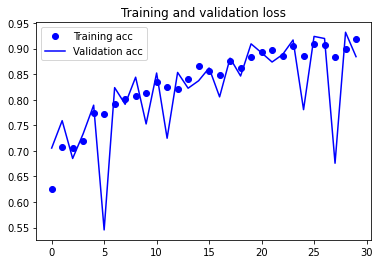

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#model.save('CNN_epoch_20.h5')

test_dir = os.path.join(base_dir,'test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'

)

test_step = math.ceil(test_generator.n/32)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_step, workers=4)
print(f'test loss = {test_loss:.4f} / test acc : {test_acc*100:.2f} %')

Found 1718 images belonging to 2 classes.


/var/folders/qz/7jppp28900j0kj82xh2k9nxm0000gn/T/ipykernel_36118/3966096403.py:15: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_step, workers=4)


test loss = 0.2735 / test acc : 88.42 %
